0.9947303166611453
1.0000094482943673
0.7511959269581376
2.21351171703088
0.5897963120286359
4.06034761979124


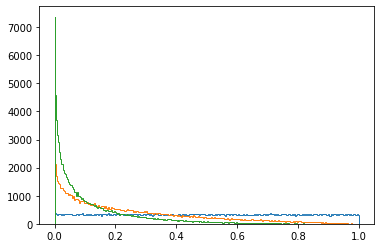

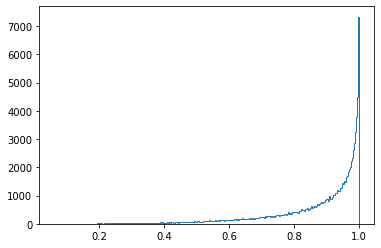

In [4]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

k = 3
z = [np.random.beta(1,1,100000) for i in range(k)]
p = [[np.prod([1 - z[x][n] for x in range(i)]) * z[i][n] for i in range(k)] for n in range(100000)]
p = [[p[i][x] for i in range(100000)] for x in range(k)]
for i in range(k):
    plt.hist(p[i], histtype = u'step', bins = 300)
    a, b, l, s = beta.fit(p[i], floc = 0, fscale = 1)
    print(a)
    print(b)
plt.show()
p_sum = [sum([p[x][i] for x in range(k)]) for i in range(100000)]
plt.hist(p_sum, histtype = u'step', bins = 300)
plt.show()

In [184]:
from pyper import *
from torch import tensor
import torch
r = R(use_pandas=True)

def skipColIdx(Y, idx):
    return torch.cat([Y[:,:~idx], Y[:,~idx:]], 1)


# m <- rowSums(Y)
    #     d <- ncol(Y)
        
    #     z <- t(apply(apply(apply(Y, 1, rev), 2, cumsum), 2, rev))
        
    #     logl <- (lgamma(m + 1) + rowSums(lgamma(Y[, -d] + alpha)) + 
    #       rowSums(lgamma(z[, -1] + beta)) + rowSums(lgamma(alpha + beta))) - 
    #       (rowSums(lgamma(Y + 1)) + rowSums(lgamma(alpha)) + rowSums(lgamma(beta)) + 
    #         rowSums(lgamma(alpha + beta + z[, -d])))

def dgdirmn(Y, alpha, beta): 
    assert beta.shape == alpha.shape

    assert alpha.shape[0] == Y.shape[1] - 1
    alpha = alpha.expand((Y.shape[0], alpha.shape[0]))#     d <- ncol(Y)
    beta = beta.expand((Y.shape[0], beta.shape[0]))#     d <- ncol(Y)

    m = Y.sum(1) #m
    Yrev = Y.T.flip(0) 
    YrevCumsum = Yrev.cumsum(0) 
    z = YrevCumsum.flip(0).T

    n1 = torch.lgamma(m + 1)
    n2 = (torch.lgamma(Y[:, :-1] + alpha)).sum(1)
    n3 = (torch.lgamma(z[:, 1:] + beta)).sum(1)
    n4 = (torch.lgamma(alpha + beta)).sum(1)

    numerator = n1 + n2 + n3 + n4
    
    d1 = torch.lgamma(Y + 1).sum(1)
    d2 = torch.lgamma(alpha).sum(1)
    d3 = torch.lgamma(beta).sum(1)
    d4 = torch.lgamma(alpha + beta + z[:, :-1]).sum(1)

    denominator = d1 + d2 + d3 + d4

    return numerator - denominator


Y = tensor([
    [0, 1, 19],
    [9, 11, 0],
    [0, 0, 20],
    [1, 19, 0],
    [0, 16, 4],
    [2, 14, 4],
    [1, 2, 17],
    [19, 1, 0],
    [2, 16, 2],
    [0, 20, 0]
]).type(torch.float32).requires_grad_(True)

alpha = tensor([0.2, 0.5])
beta = tensor([0.7, 0.4])

loss = -dgdirmn(Y, alpha, beta) 
# Ystr = "c(" + ",".join( ",".join([str(x) for x in row]) for row in Y.numpy()) + ")"
# print(Ystr)



In [185]:
# https://discuss.pytorch.org/t/loss-backward-raises-error-grad-can-be-implicitly-created-only-for-scalar-outputs/12152/2
loss.sum().backward()
Y.grad

tensor([[4.7069, 0.3913, 0.0362],
        [0.0830, 0.0572, 1.9970],
        [4.7069, 1.3913, 0.0347],
        [0.7069, 0.0314, 1.9896],
        [4.7069, 0.0357, 0.1474],
        [0.3736, 0.0411, 0.1485],
        [0.7069, 0.2251, 0.0403],
        [0.0370, 0.5290, 2.1269],
        [0.3736, 0.0368, 0.2759],
        [4.7069, 0.0296, 1.9891]])

In [172]:
import torch

x = torch.tensor([2.]).requires_grad_(True)
y = 5*x**4 + 3*x**3 + 7*x**2 + 9*x - 5

y.backward()
x.grad

tensor([233.])

In [173]:
y

tensor([145.], grad_fn=<SubBackward0>)

In [143]:
from pyro.distributions import DirichletMultinomial as DM
dm = DM(tensor([[0.1, 0.1, .8], [0.2, 0.5, .3]].T))
dm.log_prob(Y)

AttributeError: 'list' object has no attribute 'T'

In [135]:
Y

tensor([[ 0.,  1., 19.],
        [ 9., 11.,  0.],
        [ 0.,  0., 20.],
        [ 1., 19.,  0.],
        [ 0., 16., 14.],
        [ 2., 14.,  4.],
        [ 1.,  2., 17.],
        [19.,  1.,  0.],
        [ 2., 16.,  2.],
        [ 0., 20.,  0.]])

tensor([[ 1,  3,  5,  7,  9],
        [ 2,  4,  6,  8, 10]])

In [121]:
Y

tensor([[ 0.,  1., 19.],
        [ 9., 11.,  0.],
        [ 0.,  0., 20.],
        [ 1., 19.,  0.],
        [ 0., 16., 14.],
        [ 2., 14.,  4.],
        [ 1.,  2., 17.]])

In [52]:
Y.expand_as(tensor([5,10]))

RuntimeError: expand(torch.FloatTensor{[2, 5]}, size=[2]): the number of sizes provided (1) must be greater or equal to the number of dimensions in the tensor (2)

torch.Size([2, 5])

In [57]:
Y[1,].repeat(tensor([10, 5]))

TypeError: repeat(): argument 'repeats' (position 1) must be tuple of ints, not Tensor

In [65]:
Y[1,].expand_as(10)

TypeError: expand_as(): argument 'other' (position 1) must be Tensor, not int

In [62]:
Y[1,].shape

torch.Size([5])

In [71]:
Y[1,].expand((10,5))

tensor([[ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.],
        [ 2.,  4.,  6.,  8., 10.]])

tensor([[0.2000, 0.5000],
        [0.2000, 0.5000],
        [0.2000, 0.5000],
        [0.2000, 0.5000],
        [0.2000, 0.5000],
        [0.2000, 0.5000],
        [0.2000, 0.5000]])

In [80]:
Y.shape

torch.Size([7, 3])